## Tiny Portraits Project

* A low-resource deep learning/computer vision dataset
* Christian Bracher, Zalando Research
* August-September 2021

### Dataset sampler

This is a notebook designed to give an overview of the dataset, and demonstrates
a default way to access image and attribute information.

* Present random examples (images and attributes)
* Create a randomized 'wallpaper' with displaying a mosaic of faces

#### Preparation:  Unpacking images

If you have not done so yet, please unpack the image archives first.<br>
A simple tool to do this is included in the repository:
[Unpacking notebook](./Tiny%20Portraits%20-%20Unpack%20Thumbnail%20Images.ipynb)

In [1]:
import numpy as np
import os
import pandas as pd
from PIL import Image

### Image and attribute locations

* Face thumbnails in PNG format, size 108 x 84 pixels, are placed in a sub-folder
  `Tiny_Portraits_Images`. Their names are of the form:
  `Tiny_Portraits_dddddd.png`, where `dddddd` refers to the original image source in the *CelebA* dataset, 
  but shifted by one: `000001.jpg` begets `Tiny_Portraits_000000.png`, etc.
  Numbers are **not** continuous, as the thumbnails do not cover the entire *CelebA* dataset.
  
---

* The attributes are stored in a CSV file `Tiny_Portraits_Attributes.csv`.

In [2]:
thumbnail_directory = './Tiny_Portraits_Images/'

# Make sure that the images have been unpacked
if not os.path.exists(thumbnail_directory):
    print('ERROR:  Image folder not found.  Please unpack images first!')

attribute_file      = './Tiny_Portraits_Attributes.csv'

# If there are no attributes, something is wrong with the repository.
if not os.path.exists(attribute_file):
    print('ERROR:  Attribute database not found!')

#### Load attributes

* The index column (`Image_Index`) contains the file index, which allows to reconstruct the file names.
* The attributes stored are `Gender`, `Hair_Color`, and `Hair_Type`.

In [3]:
attribute_frame = pd.read_csv(attribute_file, header = 0, index_col = 0, keep_default_na = False)
image_index = attribute_frame.index

display(attribute_frame)

Gender Hair_Color Hair_Type
Image_Index                             
0            female      brown  straight
1            female      brown       n/a
4            female        n/a       n/a
5            female      brown      wavy
6              male      black  straight
...             ...        ...       ...
202593       female        n/a      wavy
202594       female      blond       n/a
202595         male      blond  straight
202596         male      black       n/a
202597       female      black      wavy

[134734 rows x 3 columns]

### Sample random elements of the dataset

* We simply pick from the index
* The auxiliary method `Load_Image_Info` below retrieves the file name as well as the row 
  in the attribute file for a given image index.  For convenience, this function also
  permits limited broadcasting (single integer index, or 1-d numpy integer array of indices)

In [4]:
def Load_Image_Info(index):
    
    # Load an image according to an image index
    # The index can also be in the form of a 1-d array (broadcasting)
    # Raises a ValueError if an index is not found
    
    # Returns the location in the attribute dataframe,
    # and file name for the thumbnail file
    # (or arrays thereof)
    
    # Use the fact that the indices are ordered
    left_insert  = np.searchsorted(image_index, index, side = 'left')
    right_insert = np.searchsorted(image_index, index, side = 'right')
    
    # For existing images, these must always differ by one
    try:
        assert np.all(right_insert - left_insert == 1)
    
    except AssertionError:
        print('Error: Tried to access an unknown image index')
        raise ValueError
        
    # Correct locations are now in left_insert
    # The file names can be reconstructed from there
    
    if not isinstance(left_insert, np.ndarray):
        file_name = thumbnail_directory + 'Tiny_Portrait_{:06d}.png'.format(index)
        
    else:
        # Broadcast over array
        file_name = np.array([thumbnail_directory + 
                              'Tiny_Portrait_{:06d}.png'.format(idx) for idx in index])
    
    return left_insert, file_name

#### Sampling and display

Image index # 84795


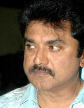

Gender.............. male
Hair_Color.......... black
Hair_Type........... wavy


In [5]:
# Select a random index
index = np.random.choice(image_index)

# Translate position, filename
position, img_file = Load_Image_Info(index)

# Load the image
img_data = Image.open(img_file)

# Indicate choice
print('Image index #{:6d}'.format(index))

# Display the information
display(img_data)

# Print attributes
for col, name in enumerate(attribute_frame.columns):
    print('{:.<20s} {:s}'.format(name, attribute_frame.iloc[position, col]))

### Create a random mosaic of faces

* Assign a grid of face thumbnails, chosen randomly
* The thumbnail size is 108 x 84 pixels

In [6]:
# Image parameters

img_width  = 84
img_height = 108

# Grid parameters
# These define the dimensions of the mosaic,
# as well as the color and thickness of the grid

# Number of rows
num_rows = 10

# Number of columns
num_cols = 22

# Grid width in pixels
grid_width = 3

# Grid color
grid_color = (128, 128, 128)

#### Create the mosaic, and display inline

* Create a background canvas of suitable size
* Paste the face thumbnails one by one

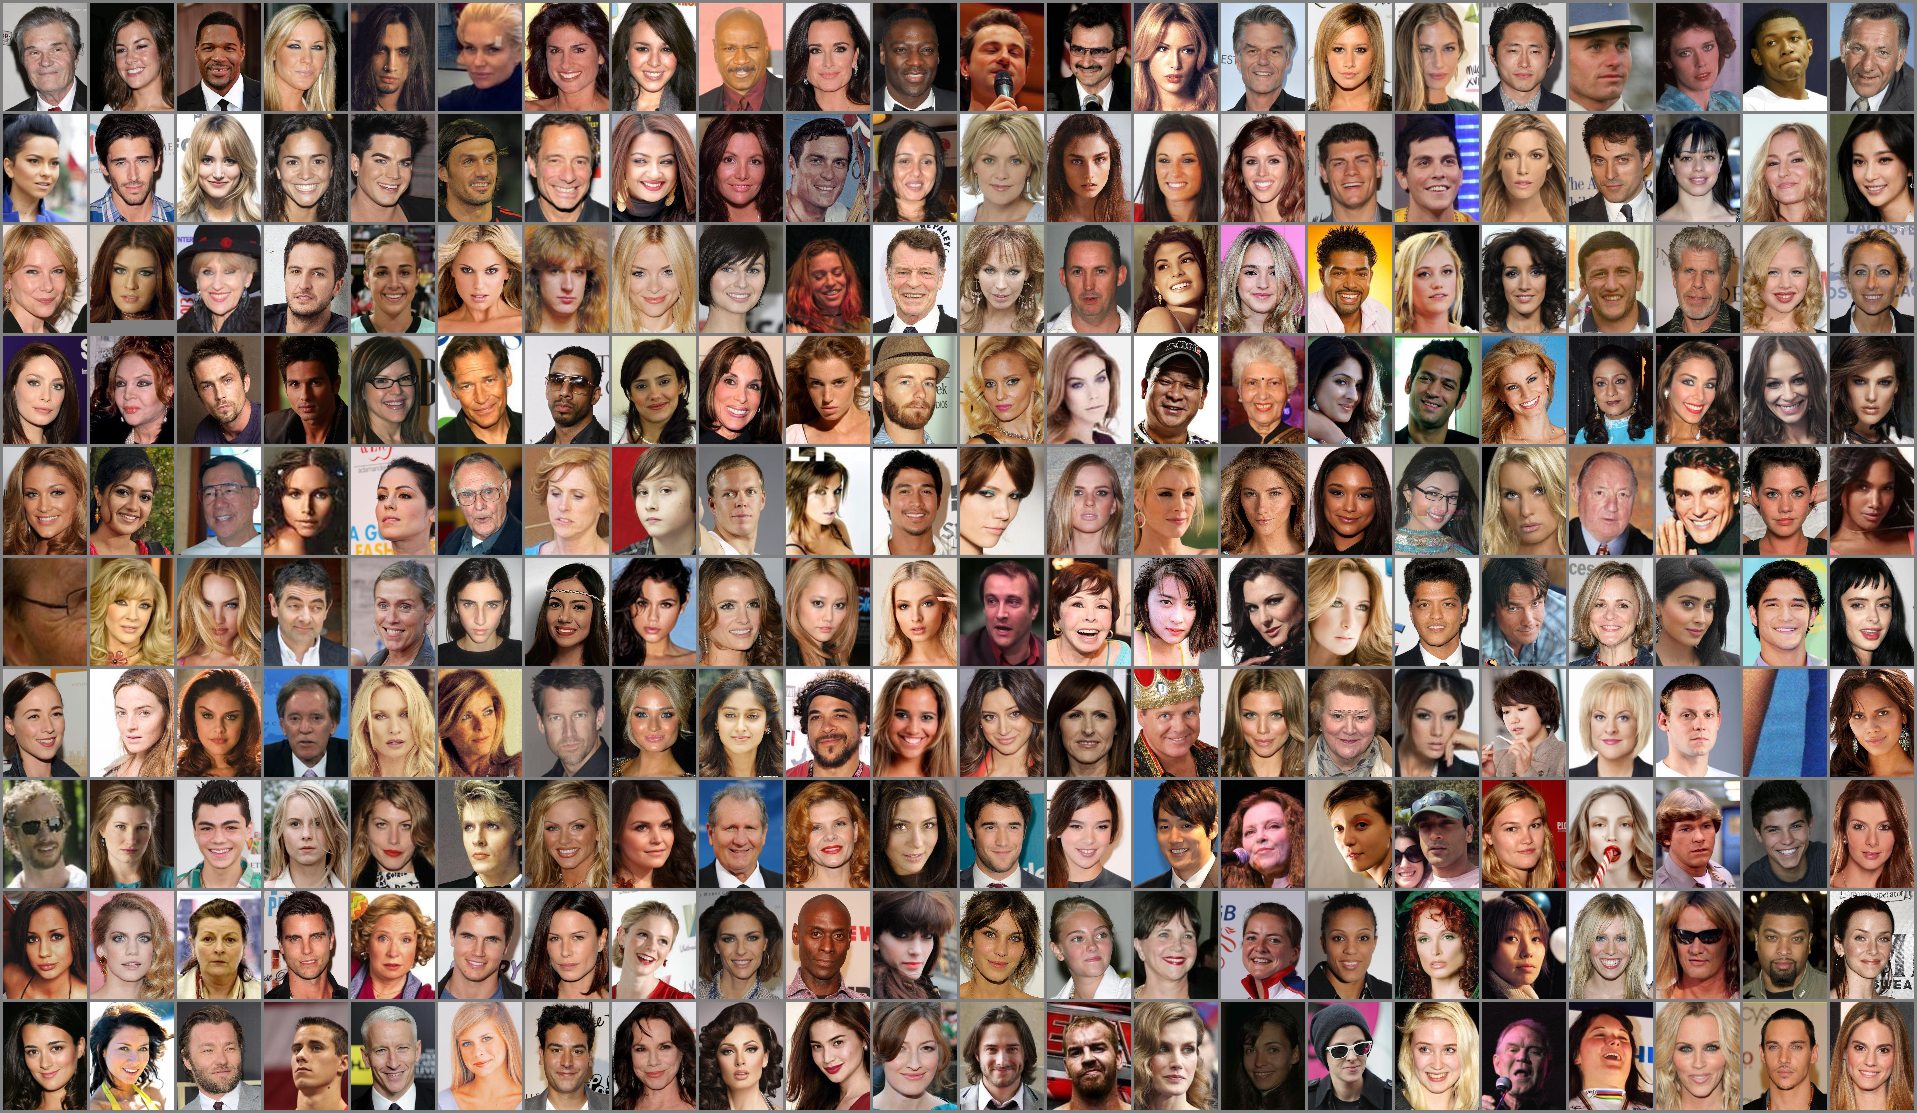

In [7]:
mosaic_width  = grid_width + (img_width  + grid_width) * num_cols
mosaic_height = grid_width + (img_height + grid_width) * num_rows

# Create an empty canvas
mosaic = Image.new('RGB', (mosaic_width, mosaic_height), grid_color)

# Create a random selection of indices
mosaic_index = np.random.choice(image_index, size = (num_rows, num_cols), replace = False)

# Find the image file names as a 2D array
_, mosaic_files = Load_Image_Info(mosaic_index.flatten())
mosaic_files = mosaic_files.reshape((num_rows, num_cols))

# Load and insert

for row in range(num_rows):
    for col in range(num_cols):
        
        # Load image
        thumbnail = Image.open(mosaic_files[row, col])
        
        # Insert image
        top_left_x = grid_width + (img_width  + grid_width) * col
        top_left_y = grid_width + (img_height + grid_width) * row
        
        mosaic.paste(thumbnail, box = (top_left_x, top_left_y))

display(mosaic)

In [ ]:
# Store mosaic to disk
# mosaic.save('Tiny_Portraits_Mosaic.jpg', format = 'jpeg', quality = 95)

### Workbench